[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/darkmetrics/banks/blob/main/code/demonstration.ipynb)

## Прогнозирование вероятности дефолта для российских банков.

**Авторы**:
* **Волкова Анастасия**
* **Дубленский Иван**
* **Лозовой Владимир**
* **Тельман Куан**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Слава богу, `pandas` умеет читать данные с интернет-страниц. Важно, что на Гитхабе на страничке файла с данными надо нажать кнопку `raw`, и тогда `url`-ссылка на файл с данными изменится, в тексте ссылки появится слово `raw`. Именно такую ссылку и надо использовать для чтения данных.

In [2]:
url = "https://raw.githubusercontent.com/darkmetrics/banks/main/data/metrics.csv"
data = pd.read_csv(url)
data.head(5)

,REGN,Year,Month,NetIncome,NetSecurityIncome,NetDerivativeIncome,NetFeeIncome,NetInvestmentIncome,NetInterestIncome,Assets,...,GeneralLiquidity,EquityToImmobilizedAssets,ownership_state,form_public,region_notmoscow,Moodys,ExpertRA,DefaultIn365Days,DefaultIn730Days,DefaultIn10000Days
0,1,2015,1,0.007337,-0.080195,1.821275,1.003520,1.127056e-07,3.267442,1.209364e+09,...,NaN,NaN,0,0,0,no,no,0,0,0
1,1,2015,2,0.006679,-0.080195,1.821275,1.003520,1.127056e-07,3.267442,1.328361e+09,...,NaN,NaN,0,0,0,no,no,0,0,0
2,1,2015,3,0.007374,-0.080195,1.821275,1.003520,1.127056e-07,3.267442,1.203223e+09,...,NaN,NaN,0,0,0,no,no,0,0,0
3,1,2015,4,0.002215,-0.075207,1.304973,0.607162,-0.000000e+00,1.858185,1.167734e+09,...,NaN,NaN,0,0,0,no,no,0,0,0
4,1,2015,5,0.002413,-0.075207,1.304973,0.607162,-0.000000e+00,1.858185,1.072174e+09,...,NaN,NaN,0,0,0,no,no,0,0,0


**Надо также добавить данные по дефолтам, тоже скачав их по ссылке.**

Поскольку столбцы `DefaultIn365Days`, `DefaultIn730Days`, `DefaultIn10000Days` нам пока не нужны, уберем их вовсе из набора с данными.

In [4]:
to_drop = ['DefaultIn365Days', 'DefaultIn730Days', 'DefaultIn10000Days']
data = data[[x for x in data.columns if x not in to_drop]]

Посмотрим на содержимое таблички: типы данных, количество пропусков.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40705 entries, 0 to 40704
Data columns (total 82 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   REGN                               40705 non-null  int64  
 1   Year                               40705 non-null  int64  
 2   Month                              40705 non-null  int64  
 3   NetIncome                          40705 non-null  float64
 4   NetSecurityIncome                  40705 non-null  float64
 5   NetDerivativeIncome                40705 non-null  float64
 6   NetFeeIncome                       40705 non-null  float64
 7   NetInvestmentIncome                40705 non-null  float64
 8   NetInterestIncome                  40705 non-null  float64
 9   Assets                             40705 non-null  float64
 10  Liabilities                        40705 non-null  float64
 11  Equity                             40705 non-null  flo

Радует, что пропуски уже заполнены (на самом деле не очень радует, потому что данных без пропусков не бывает - а раз так, то пропуски заполнил кто-то за нас, и сколько было пропусков, а также как они заполнялись, мы не узнаем, что, наверно, не очень хорошо).

Посмотрим, что из себя представляют два строковых признака, которые у нас есть:

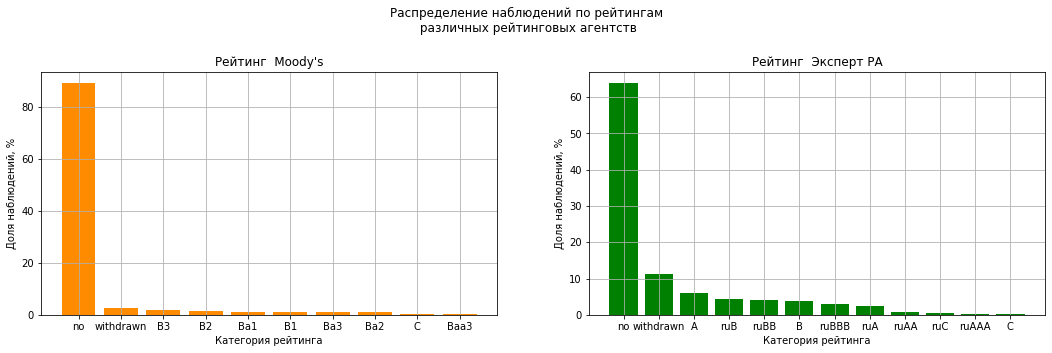

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
fig.subplots_adjust(top=0.8)

ax[0].bar(data.Moodys.value_counts().index, 
          (data.Moodys.value_counts()/len(data)*100).values, color='darkorange')
ax[0].set_title("Рейтинг  Moody's")
ax[0].set_xlabel('Категория рейтинга')
ax[0].set_ylabel('Доля наблюдений, %')
ax[0].grid(True)

ax[1].bar(data.ExpertRA.value_counts().index, 
          (data.ExpertRA.value_counts()/len(data)*100).values, color='green')
ax[1].set_title("Рейтинг  Эксперт РА")
ax[1].set_xlabel('Категория рейтинга')
ax[1].set_ylabel('Доля наблюдений, %')
ax[1].grid(True)

fig.suptitle('Распределение наблюдений по рейтингам\n различных рейтинговых агентств', y=0.98)
fig.show();

Посмотрим на распределения всех числовых признаков:

In [34]:
str_cols = ['GeneralLiquidity','EquityToImmobilizedAssets', 'Moodys', 'ExpertRA'] 
numeric = data[[x for x in data.columns if x not in str_cols]]
sns.pairplot(numeric, height=6)

KeyboardInterrupt: 

<AxesSubplot:>

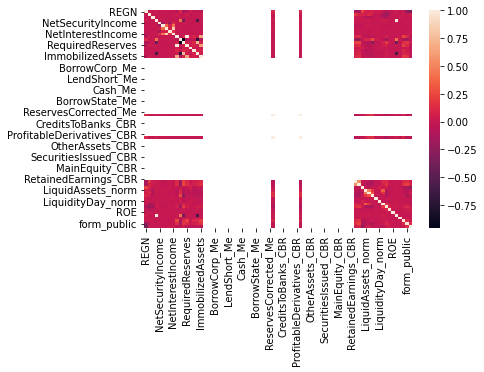

In [33]:
no_corr = ['REGN', 'Year', 'Month',
           'GeneralLiquidity','EquityToImmobilizedAssets', 'Moodys', 'ExpertRA']
sns.heatmap(numeric.corr())